In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False


import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from tensorflow.keras.layers import Dropout , BatchNormalization , Flatten , MaxPool2D,MaxPooling2D , Activation , Dense , Conv2D , InputLayer

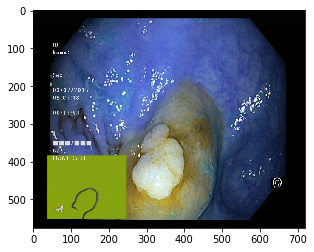

In [2]:
DATADIR_train = r'C:\Users\karti\OneDrive\Desktop\kvasir-dataset\kvasir-dataset\kvasir-dataset-v2\train'
CATEGORIES= ['dyed-lifted-polyps' , 'dyed-resection-margins' , 'esophagitis' , 'normal-cecum' , 'normal-pylorus' , 'normal-z-line', 'polyps', 'ulcerative-colitis']
 
for category in CATEGORIES:
    path = os.path.join(DATADIR_train,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))#cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap='gray')
        break
    break    
        

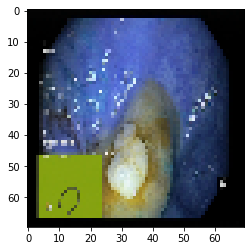

In [3]:
# to normalise the data (images)
IMG_SIZE=70
new_array = cv2.resize(img_array , (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array , cmap='gray')
plt.show()

In [4]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR_train,category)
        class_num = CATEGORIES.index(category)  # giving number to each category or mapping each category to a no. 
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))#cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array , (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array , class_num])
            except Exception as e:
                pass
        
        
create_training_data()  

In [5]:
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [10]:
# X = np.array(X)
# y=np.array(y)

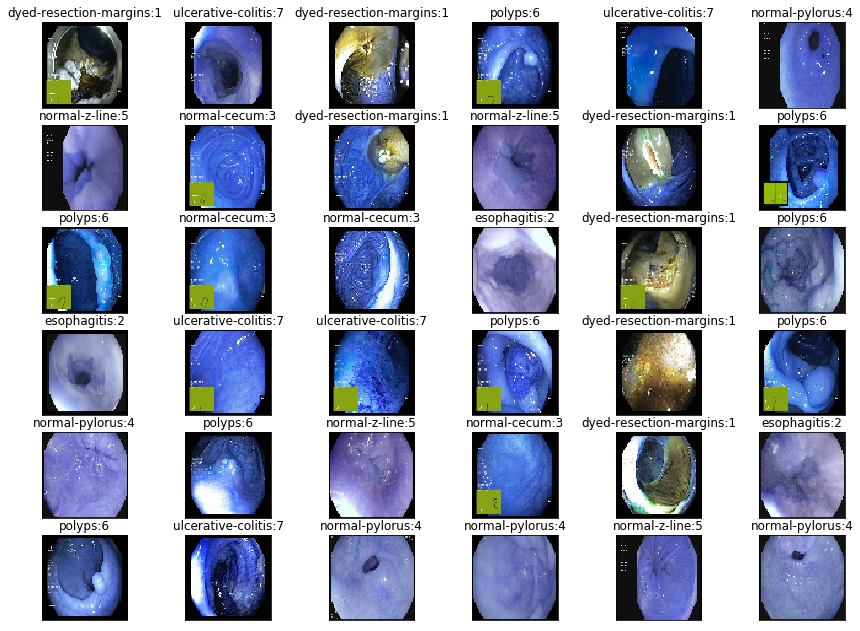

In [11]:
fig=plt.figure(figsize=(15, 11))
n = 36
for i in range(n):
    img = np.random.randint(0, X.shape[0] , 1)
    fig.add_subplot(n**(.5), n**(.5), i+1)
    plt.imshow(X[img[0]])

    plt.title('{}:{}' .format('dyed-lifted-polyps' 
                              if y[img[0]]==0 else 'dyed-resection-margins'
                              if y[img[0]]==1 else 'esophagitis' 
                              if y[img[0]]==2 else 'normal-cecum' 
                              if y[img[0]]==3 else 'normal-pylorus' 
                              if y[img[0]]==4 else 'normal-z-line' 
                              if y[img[0]]==5 else 'polyps' 
                              if y[img[0]]==6 else 'ulcerative-colitis' ,
                              y[img[0]]) )

    plt.xticks([]) , plt.yticks([])
        
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:

X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [8]:
X_train = X_train.astype("float32")/255 
X_test = X_test.astype("float32")/255

y_train = keras.utils.to_categorical(y_train , num_classes=8)
y_test = keras.utils.to_categorical(y_test , num_classes=8)

# Artificial neural network

In [53]:
annmodel = Sequential()

In [54]:
annmodel.add(Dense(units=64,activation='relu',input_shape=(70,70,3)))
annmodel.add(Dense(units=32,activation='relu'))
annmodel.add(Flatten())
annmodel.add(Dense(units=8,activation='softmax'))

annmodel.compile(loss='categorical_crossentropy',optimizer='adamax',metrics=['accuracy','mae'])

annhistory = annmodel.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32 ,epochs=10 , verbose=1 )

Train on 6000 samples, validate on 2000 samples
Epoch 1/10
6000/6000 [==============================] - 21s 4ms/sample - loss: 0.9150 - accuracy: 0.6180 - mae: 0.1209 - val_loss: 0.7217 - val_accuracy: 0.6910 - val_mae: 0.1031
Epoch 2/10
6000/6000 [==============================] - 20s 3ms/sample - loss: 0.6339 - accuracy: 0.7288 - mae: 0.0938 - val_loss: 0.6854 - val_accuracy: 0.6935 - val_mae: 0.0979
Epoch 3/10
6000/6000 [==============================] - 21s 3ms/sample - loss: 0.5983 - accuracy: 0.7380 - mae: 0.0885 - val_loss: 0.6519 - val_accuracy: 0.7050 - val_mae: 0.0931
Epoch 4/10
6000/6000 [==============================] - 20s 3ms/sample - loss: 0.5602 - accuracy: 0.7558 - mae: 0.0837 - val_loss: 0.6505 - val_accuracy: 0.7115 - val_mae: 0.0927
Epoch 5/10
6000/6000 [==============================] - 20s 3ms/sample - loss: 0.5284 - accuracy: 0.7715 - mae: 0.0806 - val_loss: 0.6445 - val_accuracy: 0.7200 - val_mae: 0.0884
Epoch 6/10
6000/6000 [==============================] - 2

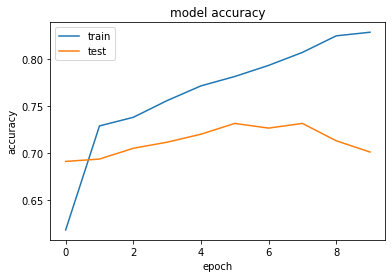

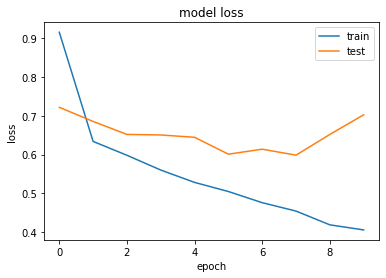

In [55]:


plt.plot(annhistory.history['accuracy'])
plt.plot(annhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ])
plt.show()

plt.plot(annhistory.history['loss'])
plt.plot(annhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show() 

# Convolution neural network 

In [10]:
cnnmodel=Sequential()

cnnmodel.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(70,70,3)))
cnnmodel.add(MaxPool2D(pool_size=2))
cnnmodel.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# cnnmodel.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
cnnmodel.add(MaxPool2D(pool_size=2))
cnnmodel.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
cnnmodel.add(MaxPool2D(pool_size=2))
cnnmodel.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# cnnmodel.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# cnnmodel.add(BatchNormalization())
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units=64, activation='relu'))
cnnmodel.add(Dense(units=8, activation='softmax' , activity_regularizer=l1(0.001)))

cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc','mae'])

cnnhistory= cnnmodel.fit(X_train, y_train, batch_size=32 , epochs=15 , verbose=1 , validation_data=(X_test,y_test))

Train on 6000 samples, validate on 2000 samples
Epoch 1/15
6000/6000 [==============================] - 51s 9ms/sample - loss: 0.9650 - acc: 0.5763 - mae: 0.1319 - val_loss: 0.7503 - val_acc: 0.6715 - val_mae: 0.1096
Epoch 2/15
6000/6000 [==============================] - 51s 8ms/sample - loss: 0.7116 - acc: 0.6813 - mae: 0.1044 - val_loss: 0.6727 - val_acc: 0.6945 - val_mae: 0.1000
Epoch 3/15
6000/6000 [==============================] - 48s 8ms/sample - loss: 0.6267 - acc: 0.7187 - mae: 0.0934 - val_loss: 0.6617 - val_acc: 0.7030 - val_mae: 0.0962
Epoch 4/15
6000/6000 [==============================] - 48s 8ms/sample - loss: 0.6053 - acc: 0.7288 - mae: 0.0900 - val_loss: 0.6985 - val_acc: 0.6735 - val_mae: 0.1005
Epoch 5/15
6000/6000 [==============================] - 48s 8ms/sample - loss: 0.5475 - acc: 0.7595 - mae: 0.0829 - val_loss: 0.6113 - val_acc: 0.7290 - val_mae: 0.0891
Epoch 6/15
6000/6000 [==============================] - 48s 8ms/sample - loss: 0.5215 - acc: 0.7678 - mae: 

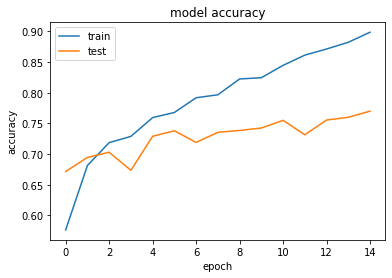

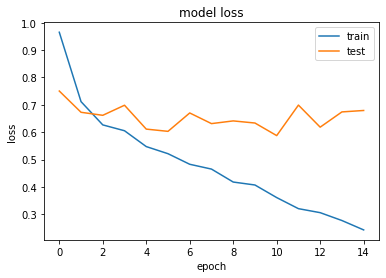

In [11]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show() 

# Data Augmentation on cnnmodel 

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\karti\OneDrive\Desktop\kvasir-dataset\kvasir-dataset\kvasir-dataset-v2\train',
        target_size=(70,70),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\karti\OneDrive\Desktop\kvasir-dataset\kvasir-dataset\kvasir-dataset-v2\test',
        target_size=(70,70),
        batch_size=32,
        class_mode='categorical')


Found 8000 images belonging to 8 classes.
Found 8000 images belonging to 8 classes.


In [16]:
cnn_augment =   cnnmodel.fit_generator(
                train_generator,
                steps_per_epoch=len(X_train)/32,
                epochs=20,
                validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 187.5 steps, validate for 250 steps
Epoch 1/20
188/187 [==============================] - 432s 2s/step - loss: 0.4097 - acc: 0.8276 - mae: 0.0618 - val_loss: 0.3730 - val_acc: 0.8375 - val_mae: 0.0546
Epoch 2/20
188/187 [==============================] - 469s 2s/step - loss: 0.4104 - acc: 0.8210 - mae: 0.0615 - val_loss: 0.3612 - val_acc: 0.8454 - val_mae: 0.0527
Epoch 3/20
188/187 [==============================] - 492s 3s/step - loss: 0.4019 - acc: 0.8290 - mae: 0.0603 - val_loss: 0.3584 - val_acc: 0.8471 - val_mae: 0.0543
Epoch 4/20
188/187 [==============================] - 449s 2s/step - loss: 0.3955 - acc: 0.8256 - mae: 0.0601 - val_loss: 0.3216 - val_acc: 0.8611 - val_mae: 0.0499
Epoch 5/20
188/187 [==============================] - 412s 2s/step - loss: 0.3796 - acc: 0.8409 - mae: 0.0573 - val_loss: 0.3295 - val_acc: 0.8593 - val_mae: 0.0485
Epoch 6/20
188/187 [==============================] - 419s 2s/step - loss: 0.38

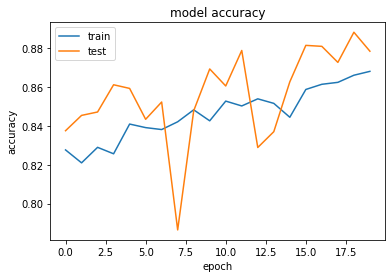

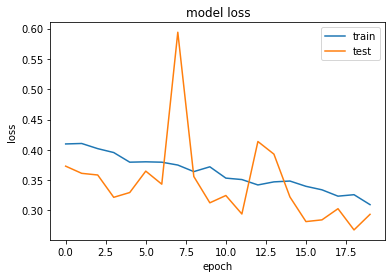

In [18]:
plt.plot(cnn_augment.history['acc'])
plt.plot(cnn_augment.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
 

plt.plot(cnn_augment.history['loss'])
plt.plot(cnn_augment.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# adding batchnormalisation and dropout layers to CNN 

In [19]:
cnn1model = Sequential()
cnn1model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu' , input_shape=(70,70,3)))
cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
cnn1model.add(Dropout(0.5))

cnn1model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
cnn1model.add(Dropout(0.5))

cnn1model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu' ))
cnn1model.add(BatchNormalization())
cnn1model.add(MaxPooling2D(pool_size=2))
cnn1model.add(Dropout(0.2))

cnn1model.add(Flatten())
cnn1model.add(Dense(50,activation='relu'))
cnn1model.add(Dense(units=8, activation='softmax',kernel_regularizer=l2(0.001), activity_regularizer=l1(0.001)))

cnn1model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 70, 70, 16)        208       
_________________________________________________________________
batch_normalization_3 (Batch (None, 70, 70, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 35, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 35, 35, 32)        2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 35, 35, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 32)       

In [20]:
cnn1model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc','mae'])
cnn1history = cnn1model.fit(X_train,y_train,batch_size=32 , epochs=100 , verbose=1 , validation_data=(X_test,y_test))

Train on 6000 samples, validate on 2000 samples
Epoch 1/100
6000/6000 [==============================] - 30s 5ms/sample - loss: 0.9850 - acc: 0.6022 - mae: 0.1180 - val_loss: 7.6055 - val_acc: 0.1240 - val_mae: 0.2172
Epoch 2/100
6000/6000 [==============================] - 29s 5ms/sample - loss: 0.6997 - acc: 0.6847 - mae: 0.0967 - val_loss: 4.4350 - val_acc: 0.2435 - val_mae: 0.1874
Epoch 3/100
6000/6000 [==============================] - 29s 5ms/sample - loss: 0.6392 - acc: 0.7137 - mae: 0.0904 - val_loss: 2.3401 - val_acc: 0.4350 - val_mae: 0.1429
Epoch 4/100
6000/6000 [==============================] - 30s 5ms/sample - loss: 0.6117 - acc: 0.7215 - mae: 0.0883 - val_loss: 1.2165 - val_acc: 0.5620 - val_mae: 0.1114
Epoch 5/100
6000/6000 [==============================] - 32s 5ms/sample - loss: 0.5894 - acc: 0.7387 - mae: 0.0855 - val_loss: 1.1441 - val_acc: 0.5930 - val_mae: 0.1068
Epoch 6/100
6000/6000 [==============================] - 31s 5ms/sample - loss: 0.5620 - acc: 0.7405 -

# RMSprop optimizer

In [56]:
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [57]:

cnn_rmsprop = Sequential()
cnn_rmsprop.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(70,70,3)))
cnn_rmsprop.add(MaxPooling2D(pool_size=2))
cnn_rmsprop.add(Dropout(0.2))
cnn_rmsprop.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=2))
cnn_rmsprop.add(Dropout(0.2))
cnn_rmsprop.add(Flatten())
cnn_rmsprop.add(Dense(units=64,activation='relu'))
cnn_rmsprop.add(Dense(units=8, activation='softmax'))
cnn_rmsprop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['categorical_accuracy'])
history_rmsprop=cnn_rmsprop.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,verbose=1,callbacks=[reduce_lr])


Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.9879 - categorical_accuracy: 0.5673 - val_loss: 0.7626 - val_categorical_accuracy: 0.6705
Epoch 2/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7292 - categorical_accuracy: 0.6693 - val_loss: 0.7068 - val_categorical_accuracy: 0.6960
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6491 - categorical_accuracy: 0.7082 - val_loss: 0.6632 - val_categorical_accuracy: 0.6805
Epoch 4/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6064 - categorical_accuracy: 0.7247 - val_loss: 0.7690 - val_categorical_accuracy: 0.6440
Epoch 5/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.5720 - categorical_accuracy: 0.7440 - val_loss: 0.6476 - val_categorical_accuracy: 0.7165
Epoch 6/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.5563 - categoric

# ADAM optimizer

In [58]:
cnnmodel_adam = Sequential()

cnnmodel_adam.add(Conv2D(filters=16,kernel_size=(2,2),padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_adam.add(MaxPooling2D(pool_size=2))
cnnmodel_adam.add(Dropout(0.2))
cnnmodel_adam.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adam.add(MaxPooling2D(pool_size=2))
cnnmodel_adam.add(Dropout(0.2))
cnnmodel_adam.add(Flatten())
cnnmodel_adam.add(Dense(64,activation="relu"))
cnnmodel_adam.add(Dense(8,activation="softmax")) 
cnnmodel_adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history_adam = cnnmodel_adam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1,callbacks=[reduce_lr])





Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 1.1914 - categorical_accuracy: 0.5237 - val_loss: 0.8994 - val_categorical_accuracy: 0.6305
Epoch 2/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7587 - categorical_accuracy: 0.6677 - val_loss: 0.8559 - val_categorical_accuracy: 0.6300
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6791 - categorical_accuracy: 0.6978 - val_loss: 0.7492 - val_categorical_accuracy: 0.6705
Epoch 4/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6276 - categorical_accuracy: 0.7208 - val_loss: 0.7461 - val_categorical_accuracy: 0.6745
Epoch 5/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6078 - categorical_accuracy: 0.7322 - val_loss: 0.7156 - val_categorical_accuracy: 0.6790
Epoch 6/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.5831 - categoric

# Nadam Optimizer

In [59]:
cnnmodel_nadam= Sequential()
cnnmodel_nadam.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_nadam.add(MaxPooling2D(pool_size=2))
cnnmodel_nadam.add(Dropout(0.2))
cnnmodel_nadam.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_nadam.add(MaxPooling2D(pool_size=2))
cnnmodel_nadam.add(Dropout(0.2))
cnnmodel_nadam.add(Flatten())
cnnmodel_nadam.add(Dense(64,activation="relu"))
cnnmodel_nadam.add(Dense(8,activation="softmax"))
cnnmodel_nadam.compile(optimizer=Nadam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history_nadam = cnnmodel_nadam.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1, callbacks=[reduce_lr])

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 15s 2ms/sample - loss: 1.0433 - categorical_accuracy: 0.5607 - val_loss: 0.8211 - val_categorical_accuracy: 0.6330
Epoch 2/20
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.7113 - categorical_accuracy: 0.6725 - val_loss: 0.7657 - val_categorical_accuracy: 0.6400
Epoch 3/20
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.6428 - categorical_accuracy: 0.7098 - val_loss: 0.7238 - val_categorical_accuracy: 0.6650
Epoch 4/20
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.6082 - categorical_accuracy: 0.7223 - val_loss: 0.6858 - val_categorical_accuracy: 0.6880
Epoch 5/20
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.5929 - categorical_accuracy: 0.7313 - val_loss: 0.6695 - val_categorical_accuracy: 0.7030
Epoch 6/20
6000/6000 [==============================] - 14s 2ms/sample - loss: 0.5676 - categoric

# SGD optimizer

In [60]:
cnnmodel_sgd=Sequential()
cnnmodel_sgd.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_sgd.add(MaxPooling2D(pool_size=2))
cnnmodel_sgd.add(Dropout(0.2))
cnnmodel_sgd.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgd.add(MaxPooling2D(pool_size=2))
cnnmodel_sgd.add(Dropout(0.2))
cnnmodel_sgd.add(Flatten())
cnnmodel_sgd.add(Dense(64,activation="relu"))
cnnmodel_sgd.add(Dense(8,activation="softmax"))
cnnmodel_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history_sgd = cnnmodel_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1, callbacks=[reduce_lr])

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 1.4733 - categorical_accuracy: 0.4177 - val_loss: 1.1327 - val_categorical_accuracy: 0.5245
Epoch 2/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.9291 - categorical_accuracy: 0.5935 - val_loss: 0.9632 - val_categorical_accuracy: 0.5420
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.8212 - categorical_accuracy: 0.6363 - val_loss: 0.7991 - val_categorical_accuracy: 0.6525
Epoch 4/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7628 - categorical_accuracy: 0.6663 - val_loss: 0.7765 - val_categorical_accuracy: 0.6605
Epoch 5/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.7306 - categorical_accuracy: 0.6698 - val_loss: 0.8367 - val_categorical_accuracy: 0.6235
Epoch 6/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.7069 - categoric

# SGD with Nesterov


In [61]:
cnnmodel_sgdnesterov = Sequential()
cnnmodel_sgdnesterov.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_sgdnesterov.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnesterov.add(Dropout(0.2))
cnnmodel_sgdnesterov.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdnesterov.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnesterov.add(Dropout(0.2))
cnnmodel_sgdnesterov.add(Flatten())
cnnmodel_sgdnesterov.add(Dense(64,activation="relu"))
cnnmodel_sgdnesterov.add(Dense(8,activation="softmax"))
cnnmodel_sgdnesterov.compile(optimizer=SGD(nesterov=True), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history_sgdnesterov = cnnmodel_sgdnesterov.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1, callbacks=[reduce_lr])

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 1.4919 - categorical_accuracy: 0.3915 - val_loss: 1.1383 - val_categorical_accuracy: 0.5115
Epoch 2/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.9702 - categorical_accuracy: 0.5685 - val_loss: 0.9661 - val_categorical_accuracy: 0.5890
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.8474 - categorical_accuracy: 0.6172 - val_loss: 0.8511 - val_categorical_accuracy: 0.6205
Epoch 4/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.7895 - categorical_accuracy: 0.6552 - val_loss: 0.7940 - val_categorical_accuracy: 0.6390
Epoch 5/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7524 - categorical_accuracy: 0.6642 - val_loss: 0.8173 - val_categorical_accuracy: 0.6545
Epoch 6/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7138 - categoric

# SGD + Nesterov + Momentum

In [62]:
cnnmodel_sgdnestmomentum = Sequential()
cnnmodel_sgdnestmomentum.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_sgdnestmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnestmomentum.add(Dropout(0.2))
cnnmodel_sgdnestmomentum.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_sgdnestmomentum.add(MaxPooling2D(pool_size=2))
cnnmodel_sgdnestmomentum.add(Dropout(0.2))
cnnmodel_sgdnestmomentum.add(Flatten())
cnnmodel_sgdnestmomentum.add(Dense(64,activation="relu"))
cnnmodel_sgdnestmomentum.add(Dense(8,activation="softmax"))
cnnmodel_sgdnestmomentum.compile(optimizer=SGD(momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history_sgdnestmomentum = cnnmodel_sgdnestmomentum.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1, callbacks=[reduce_lr])

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 1.0103 - categorical_accuracy: 0.5592 - val_loss: 0.7768 - val_categorical_accuracy: 0.6685
Epoch 2/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.7298 - categorical_accuracy: 0.6670 - val_loss: 0.7720 - val_categorical_accuracy: 0.6520
Epoch 3/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.6753 - categorical_accuracy: 0.6932 - val_loss: 0.7703 - val_categorical_accuracy: 0.6680
Epoch 4/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.6597 - categorical_accuracy: 0.6918 - val_loss: 0.7000 - val_categorical_accuracy: 0.6890
Epoch 5/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.6144 - categorical_accuracy: 0.7147 - val_loss: 0.7327 - val_categorical_accuracy: 0.6650
Epoch 6/20
6000/6000 [==============================] - 12s 2ms/sample - loss: 0.5872 - categoric

# Adagrad optimizer


In [64]:
cnnmodel_adagrad = Sequential()
cnnmodel_adagrad.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_adagrad.add(MaxPooling2D(pool_size=2))
cnnmodel_adagrad.add(Dropout(0.2))
cnnmodel_adagrad.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adagrad.add(MaxPooling2D(pool_size=2))
cnnmodel_adagrad.add(Dropout(0.2))
cnnmodel_adagrad.add(Flatten())
cnnmodel_adagrad.add(Dense(64,activation="relu"))
cnnmodel_adagrad.add(Dense(8,activation="softmax")) 
cnnmodel_adagrad.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history_adagrad = cnnmodel_adagrad.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1, callbacks=[reduce_lr])

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 1.2567 - categorical_accuracy: 0.5243 - val_loss: 1.0161 - val_categorical_accuracy: 0.6080
Epoch 2/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.8595 - categorical_accuracy: 0.6452 - val_loss: 0.8856 - val_categorical_accuracy: 0.6300
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7824 - categorical_accuracy: 0.6702 - val_loss: 0.8458 - val_categorical_accuracy: 0.6315
Epoch 4/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7468 - categorical_accuracy: 0.6778 - val_loss: 0.8340 - val_categorical_accuracy: 0.6370
Epoch 5/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7254 - categorical_accuracy: 0.6868 - val_loss: 0.7956 - val_categorical_accuracy: 0.6520
Epoch 6/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7095 - categoric

# Adamax optimizer

In [65]:
from keras.layers import BatchNormalization
cnnmodel_adamax = Sequential()
cnnmodel_adamax.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(70,70,3)))
cnnmodel_adamax.add(MaxPooling2D(pool_size=2))
cnnmodel_adamax.add(Dropout(0.2))
cnnmodel_adamax.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_adamax.add(MaxPooling2D(pool_size=2))
cnnmodel_adamax.add(Dropout(0.2))
cnnmodel_adamax.add(Flatten())
cnnmodel_adamax.add(Dense(64,activation="relu"))
cnnmodel_adamax.add(Dense(8,activation="softmax")) 
cnnmodel_adamax.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history_adamax = cnnmodel_adamax.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1, callbacks=[reduce_lr])

Train on 6000 samples, validate on 2000 samples
Epoch 1/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 1.1812 - categorical_accuracy: 0.5198 - val_loss: 0.9404 - val_categorical_accuracy: 0.5560
Epoch 2/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.7736 - categorical_accuracy: 0.6583 - val_loss: 0.7875 - val_categorical_accuracy: 0.6430
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6882 - categorical_accuracy: 0.6970 - val_loss: 0.7292 - val_categorical_accuracy: 0.6760
Epoch 4/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6534 - categorical_accuracy: 0.7115 - val_loss: 0.7303 - val_categorical_accuracy: 0.6615
Epoch 5/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6234 - categorical_accuracy: 0.7192 - val_loss: 0.7180 - val_categorical_accuracy: 0.6755
Epoch 6/20
6000/6000 [==============================] - 13s 2ms/sample - loss: 0.6085 - categoric

# Plots of different Optimizers (CNN)

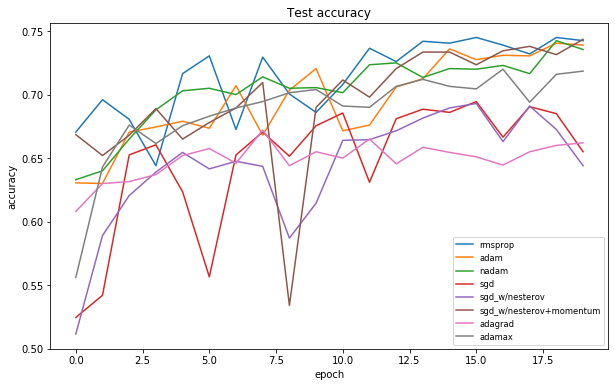

In [75]:
plt.figure(figsize=(10, 6))  
plt.plot(history_rmsprop.history['val_categorical_accuracy'])
plt.plot(history_adam.history['val_categorical_accuracy'])
plt.plot(history_nadam.history['val_categorical_accuracy'])
plt.plot(history_sgd.history['val_categorical_accuracy'])
plt.plot(history_sgdnesterov.history['val_categorical_accuracy'])
plt.plot(history_sgdnestmomentum.history['val_categorical_accuracy'])
plt.plot(history_adagrad.history['val_categorical_accuracy'])
plt.plot(history_adamax.history['val_categorical_accuracy'])
plt.title('Test accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov',  'sgd_w/nesterov+momentum', 'adagrad',  'adamax'], fontsize = 'small')  

plt.show()

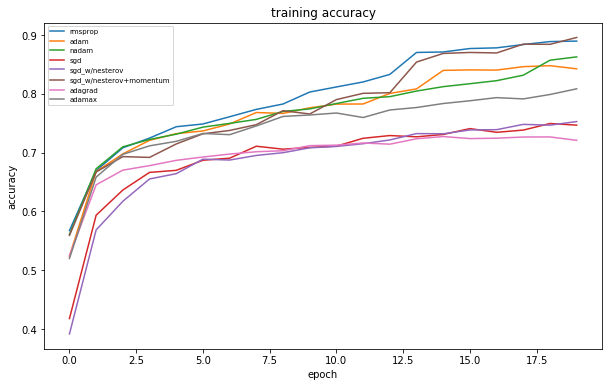

In [76]:
plt.figure(figsize=(10, 6))  
plt.plot(history_rmsprop.history['categorical_accuracy'])  
plt.plot(history_adam.history['categorical_accuracy'])  
plt.plot(history_nadam.history['categorical_accuracy']) 
plt.plot(history_sgd.history['categorical_accuracy']) 
plt.plot(history_sgdnesterov.history['categorical_accuracy']) 
plt.plot(history_sgdnestmomentum.history['categorical_accuracy'])
plt.plot(history_adagrad.history['categorical_accuracy'])
plt.plot(history_adamax.history['categorical_accuracy'])
plt.title('training accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/nesterov+momentum', 'adagrad',  'adamax'], fontsize = 'x-small')  
plt.show()

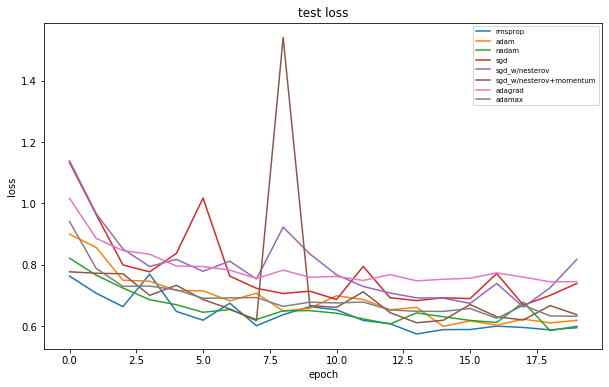

In [77]:
plt.figure(figsize=(10, 6))  
plt.plot(history_rmsprop.history['val_loss'])  
plt.plot(history_adam.history['val_loss'])  
plt.plot(history_nadam.history['val_loss']) 
plt.plot(history_sgd.history['val_loss']) 
plt.plot(history_sgdnesterov.history['val_loss']) 
plt.plot(history_sgdnestmomentum.history['val_loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.plot(history_adamax.history['val_loss'])
plt.title('test loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov', 'sgd_w/nesterov+momentum', 'adagrad',  'adamax'], loc='upper right', fontsize = 'x-small')  

plt.show()

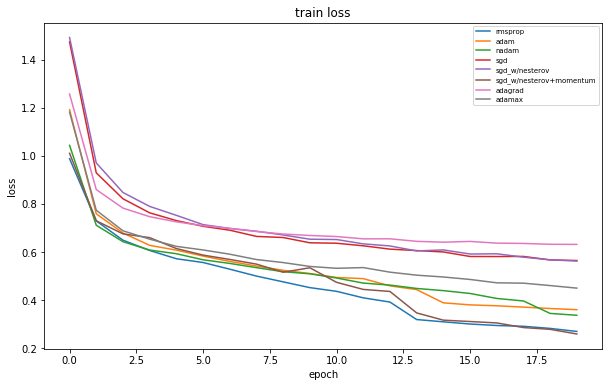

In [78]:
plt.figure(figsize=(10, 6))  
plt.plot(history_rmsprop.history['loss'])  
plt.plot(history_adam.history['loss'])  
plt.plot(history_nadam.history['loss']) 
plt.plot(history_sgd.history['loss']) 
plt.plot(history_sgdnesterov.history['loss']) 
plt.plot(history_sgdnestmomentum.history['loss'])
plt.plot(history_adagrad.history['loss'])
plt.plot(history_adamax.history['loss'])
plt.title('train loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'nadam', 'sgd', 'sgd_w/nesterov',  'sgd_w/nesterov+momentum', 'adagrad',  'adamax'], loc='upper right',fontsize = 'x-small')  

plt.show()